# Multivariate Linear Regression

> When more than one feature is used in a linear regression model.
>> The hypothesis in this case is that the prediction function will be of the form: $p(x) = a0 + a1x1 + a2x2 + a3x3 + ...$ ; where x1, x2, x3 ... are the features of the dataset and the parameters a0, a1, a2, ... are the constants we want to discover .


## Notation

> Assuming x0 = 1, x1, x2, x3, ... compose a vector called x; and a0, a1, a2, ... a vector called a, the prediction function can be writen as $p(x) = aTx$, where aT is the transpose of the vector a.

## Gradient Descent

> The algorithm used to update the parameters in this case is analogous to the one used in linear regression and is given by: $aj := aj - l\frac{1}{m}\sum_{i=1}^{m}(p(x^{(i)})-y^{(i)})xj^{(i)}$, simultaneously updated.

In [207]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d

### Creating a dataframe
> I used the numpy library to create three arrays, then joined them in a dataframe with the pandas library. The arrays refer to the Systolic Blood Pressure Data, available at http://college.cengage.com/mathematics/brase/understandable_statistics/7e/students/datasets/mlr/frames/frame.html. 

In [208]:
y = np.array([132, 143, 153, 162, 154, 168, 137, 149, 159, 128, 166])
len(y)

11

In [209]:
x1 = np.array([52, 59, 67, 73, 64, 74, 54, 61, 65, 46, 72])
len(x1)

11

In [210]:
x2 = np.array([173, 184, 194, 211, 196, 220, 188, 188, 207, 167, 217])
len(x2)

11

In [211]:
data = pd.DataFrame({'blood_pressure' : y, 'age' : x1, 'weight' : x2})
data

,age,blood_pressure,weight
0,52,132,173
1,59,143,184
2,67,153,194
3,73,162,211
4,64,154,196
5,74,168,220
6,54,137,188
7,61,149,188
8,65,159,207
9,46,128,167


> Assuming the variable to be predicted is the blood pressure, given the individual's age and weight, the prediction function will be given in relation to x1 and x2.
> The optimization process is analogous to the one used for the simpler linear regression model with one variable.

In [212]:
a = np.random.randn()
b = np.random.randn()
c = np.random.randn()
print (a, b, c)

-0.2447903837012443 -0.5458270824589321 -1.2168024359534748


In [213]:
p = a*x1 + b*x2 + c
p

array([-108.37398765, -116.09161825, -123.50821214, -134.25601484,
       -123.86549515, -139.41324897, -117.05097466, -118.76450734,
       -130.11438345, -103.63028286, -137.28618696])

In [214]:
l = 0.000001
for i in range(0,10000):
    cost_var = p - y
    cost_ar = (cost_var)**2
    cost = 0
    for j in range(0,len(cost_ar)):
        cost = cost + cost_ar[j]
   # print ('cost is', cost)
    cost_der_c_ar = (cost_var)
    cost_der_c = 0
    cost_der_a_ar = (cost_var)*x1
    cost_der_a = 0
    cost_der_b_ar = (cost_var)*x2
    cost_der_b = 0
    for k in range(0,len(cost_der_b_ar)):
        cost_der_b = cost_der_b + cost_der_b_ar[k]
        cost_der_a = cost_der_a + cost_der_a_ar[k]
        cost_der_c = cost_der_c + cost_der_c_ar[k]
   
    b = b - l*cost_der_b
    a = a - l*cost_der_a
    c = c - l*cost_der_c
    p = a*x1 + b*x2 + c
    
  

> Visually, the prediction function in this example equates to a plane that fits the data in a 3D space. This plane suggests all the points possible for a given set of independent vaiables (x1 and x2). If the problem at hand would involve 3 independent variables, the prediction function would equivalate to a 3D space contained in a 4D space and so on...

<IPython.core.display.Javascript object>


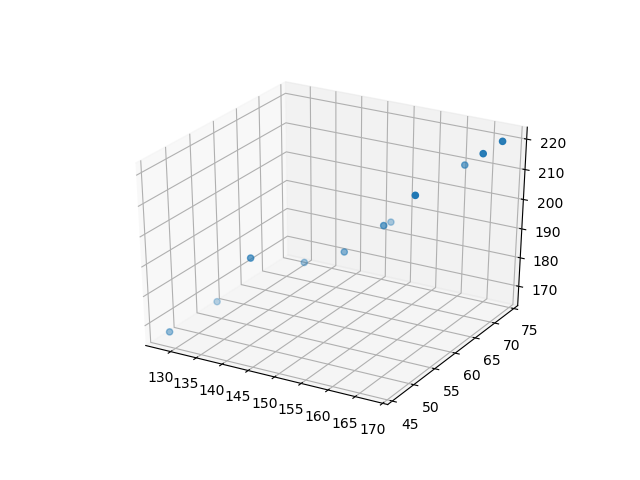

In [215]:
%matplotlib notebook
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(y, x1, x2)
plt.show()

### Prediction Example
> Suppose an individual is 67 years old and has a weight of 190 pounds, I defined a function that predicts the blood pressure according to the model as follow:

In [216]:
def bp(age, weight):
    blood = a*age + b*weight + c
    print ('The estimated blood pressure is', blood )
    return

In [217]:
bp(67, 190)

The estimated blood pressure is 148.19057271758834
